#**Samima Siddiq**

### **Machine Learning Intern @SYNC Intern's**

### **Task 4: Sign Language Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/sign_language_data/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/sign_language_data/sign_mnist_test/sign_mnist_test.csv')

# Split the data into input features and labels
X_train = train_df.iloc[:,1:].values /255
y_train = train_df.iloc[:,0].values
X_test = test_df.iloc[:,1:].values /255
y_test = test_df.iloc[:,0].values

# Reshape the input features to be 4D tensors
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

# Convert the labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(25, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test_cat))


Epoch 1/10
215/215 [==============================] - 36s 162ms/step - loss: 2.5171 - accuracy: 0.2283 - val_loss: 1.5081 - val_accuracy: 0.5109
Epoch 2/10
215/215 [==============================] - 37s 174ms/step - loss: 1.0260 - accuracy: 0.6595 - val_loss: 0.7363 - val_accuracy: 0.7287
Epoch 3/10
215/215 [==============================] - 35s 161ms/step - loss: 0.5507 - accuracy: 0.8134 - val_loss: 0.4954 - val_accuracy: 0.8247
Epoch 4/10
215/215 [==============================] - 35s 163ms/step - loss: 0.3574 - accuracy: 0.8807 - val_loss: 0.3730 - val_accuracy: 0.8710
Epoch 5/10
215/215 [==============================] - 37s 170ms/step - loss: 0.2396 - accuracy: 0.9212 - val_loss: 0.3199 - val_accuracy: 0.8908
Epoch 6/10
215/215 [==============================] - 36s 166ms/step - loss: 0.1813 - accuracy: 0.9415 - val_loss: 0.3027 - val_accuracy: 0.9246
Epoch 7/10
215/215 [==============================] - 38s 176ms/step - loss: 0.1364 - accuracy: 0.9576 - val_loss: 0.2660 - val_ac

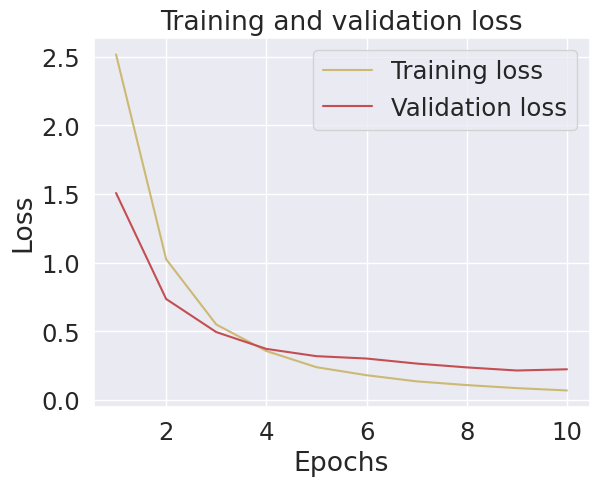

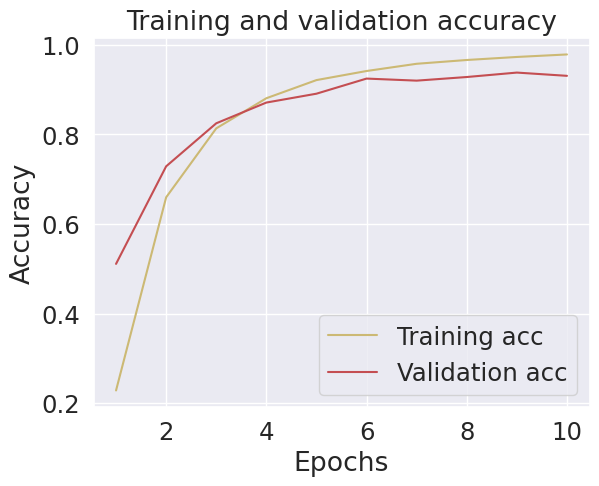

In [47]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


225/225 [==============================] - 2s 10ms/step
Accuracy Score =  0.9307027328499721
Predicted Label:  F
True Label:  F


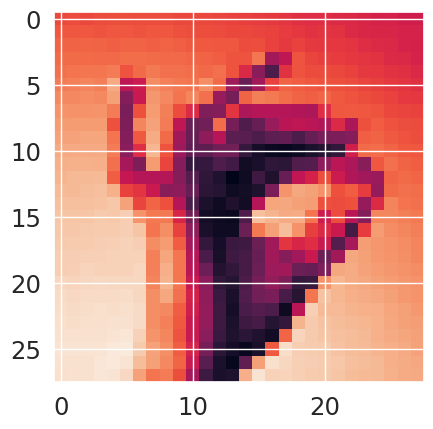

In [67]:
# predict on test set
prediction = np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])]) 


<Axes: >

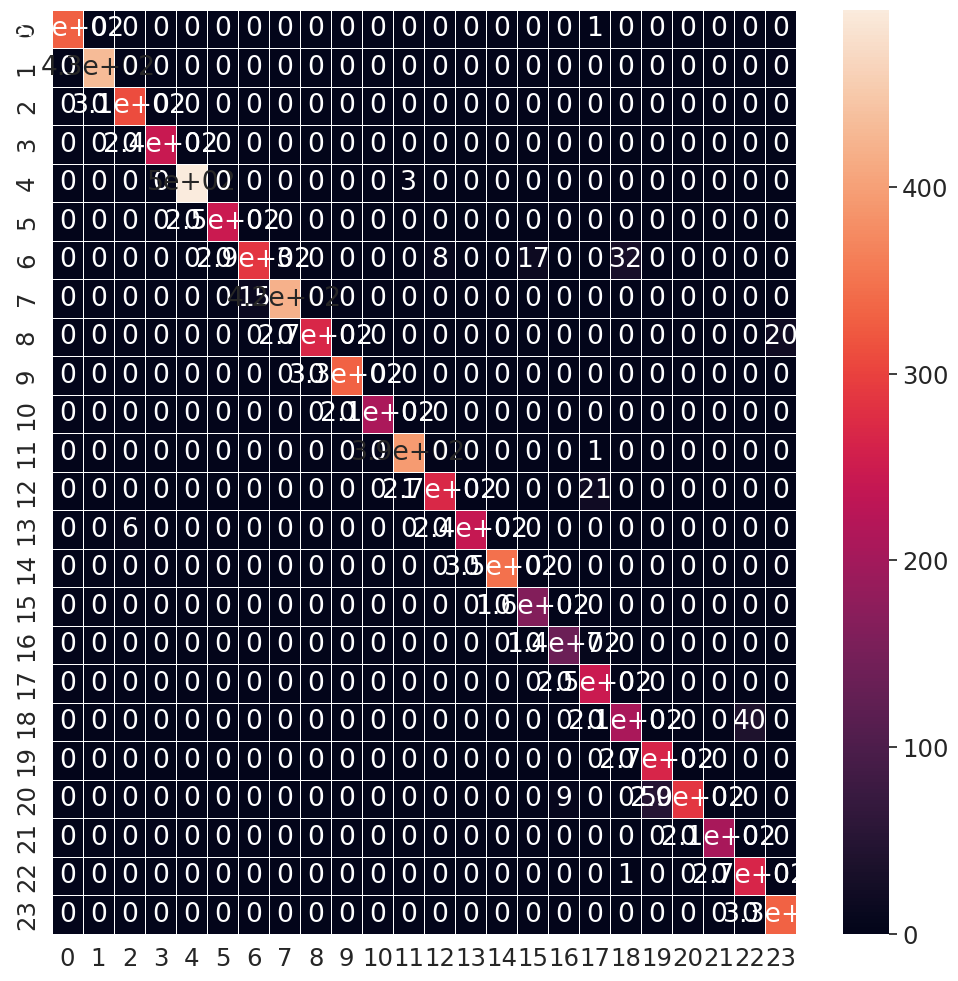

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)